In [1]:
import os
import sys
from datetime import timedelta
from pathlib import Path
from glob import glob
from scipy.io import FortranFile
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['DEV'], 'sunflower'))
sys.path.append(os.path.join(os.environ['DEV'], 'sunflower/balltracking'))
import balltrack as blt

In [2]:
vpfs = sorted(glob('../tests/vp*.data'))
vtfs = sorted(glob('../tests/vt*.data'))
nfiles = len(vpfs)
print(nfiles, vpfs[0], vtfs[0])

59 ../tests/vp000001.data ../tests/vt000001.data


In [3]:
nx = 2048
ny = 1024

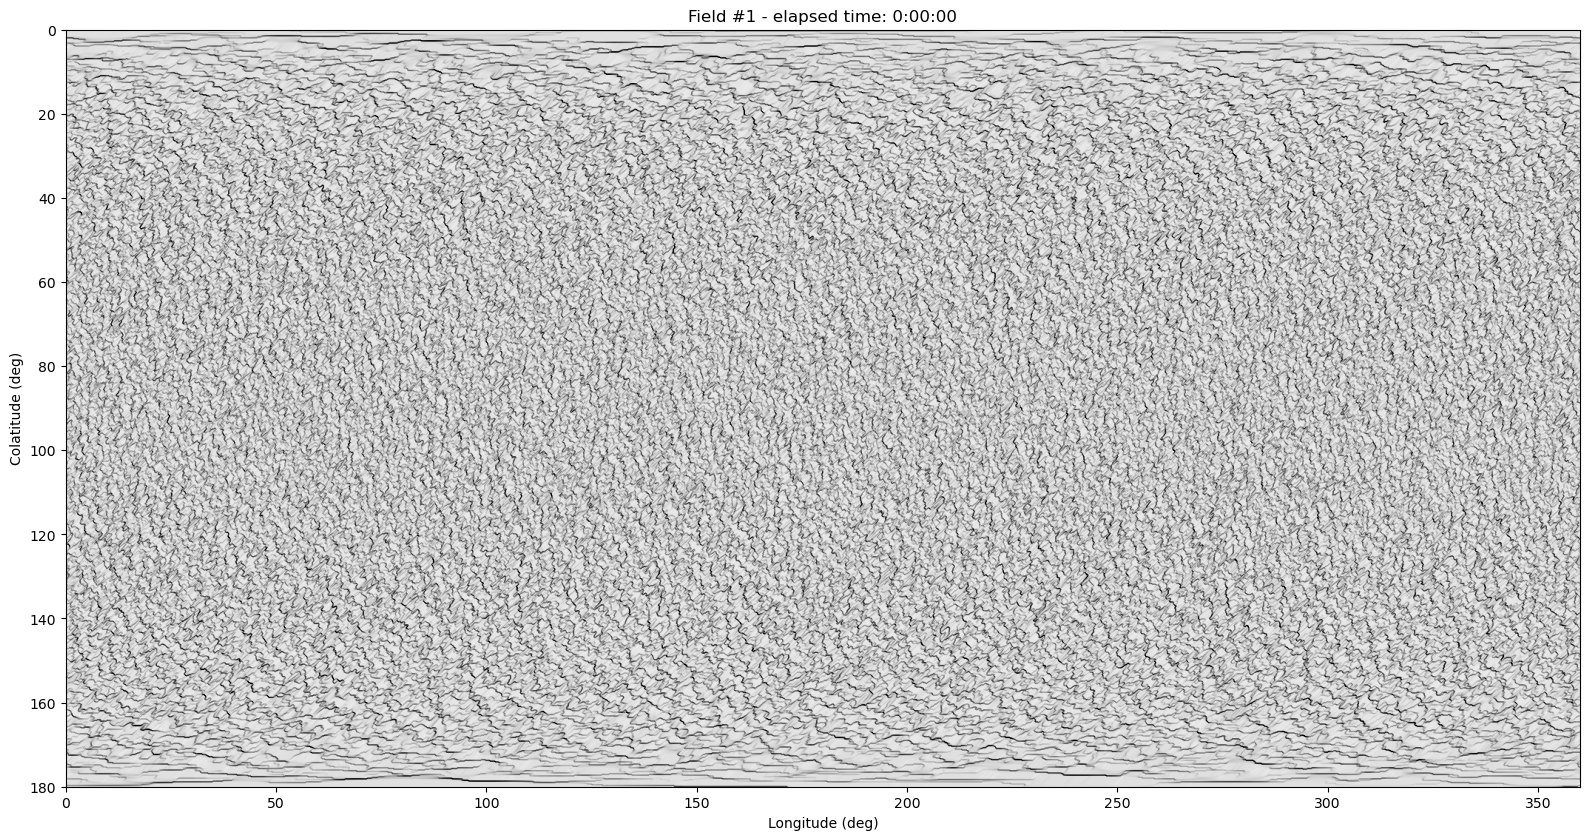

In [4]:
plt.close('all')
for i in range(1):
    vp = np.fromfile(vpfs[i]).reshape([ny, nx])
    vt = np.fromfile(vpfs[i]).reshape([ny, nx])
    lanes = blt.make_lanes(vp, vt, 20, 1)
    dt = i*timedelta(minutes=15)
    plt.figure(figsize=(16, 10))
    plt.imshow(lanes, origin='lower', vmin=0, vmax=8, extent=(0, 360, 180, 0), cmap='gray_r')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Colatitude (deg)')
    plt.title(f'Field #{i+1} - elapsed time: {str(dt)}')
    plt.tight_layout()
    plt.show()
    # plt.savefig(os.path.join(os.environ['DATA'], f'ConFlow/sanity_check/HR_snapshot_lanes_{i+1:06d}.jpg'), dpi=180)
    # plt.close('all')

In [5]:
# Create list of file series to average
navg = 20
tranges = [[i, i + navg] for i in range(0, nfiles, navg)]
print(tranges)

[[0, 20], [20, 40], [40, 60]]


[0, 20]
['../tests/vp000001.data', '../tests/vp000002.data', '../tests/vp000003.data', '../tests/vp000004.data', '../tests/vp000005.data', '../tests/vp000006.data', '../tests/vp000007.data', '../tests/vp000008.data', '../tests/vp000009.data', '../tests/vp000010.data', '../tests/vp000011.data', '../tests/vp000012.data', '../tests/vp000013.data', '../tests/vp000014.data', '../tests/vp000015.data', '../tests/vp000016.data', '../tests/vp000017.data', '../tests/vp000018.data', '../tests/vp000019.data', '../tests/vp000020.data']


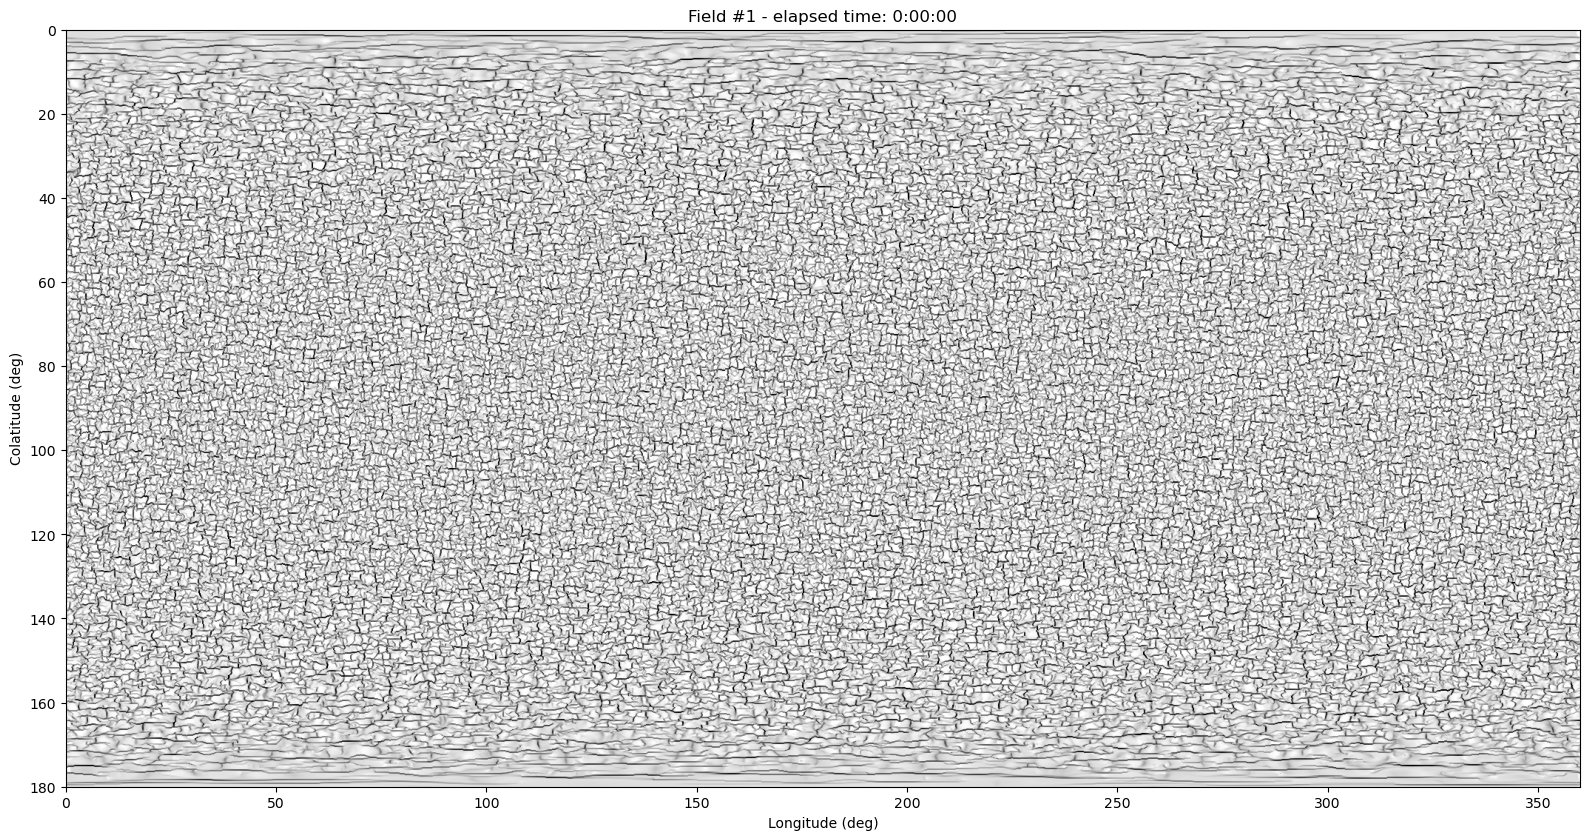

In [6]:
for i, trange in enumerate(tranges[0:1]):
    dt = i*timedelta(minutes=navg*15)
    vpf_list = vpfs[trange[0]:trange[1]]
    print(trange)
    print(vpf_list)
    vtf_list = vtfs[trange[0]:trange[1]]

    vps = np.zeros([navg, ny, nx])
    vts = np.zeros([navg, ny, nx])
    for k, (vpf, vtf) in enumerate(zip(vpf_list, vtf_list)):
        vps[k, ...] = np.fromfile(vpf).reshape([ny, nx])
        vts[k, ...] = np.fromfile(vtf).reshape([ny, nx])
    vp = vps.mean(axis=0)
    vt = vts.mean(axis=0)

    lanes = blt.make_lanes(vp, vt, 20, 1)
    plt.figure(figsize=(16, 10))
    plt.imshow(lanes, origin='lower', vmin=0, vmax=8, extent=(0, 360, 180, 0), cmap='gray_r')
    plt.xlabel('Longitude (deg)')
    plt.ylabel('Colatitude (deg)')
    plt.title(f'Field #{i+1} - elapsed time: {str(dt)}')
    plt.tight_layout()
    plt.savefig(os.path.join(os.environ['DATA'], f'ConFlow/sanity_check/HR_lanes_avg_deg_{i+1:06d}.jpg'), dpi=180)
    # plt.close('all')

In [11]:
import cartopy.crs as ccrs

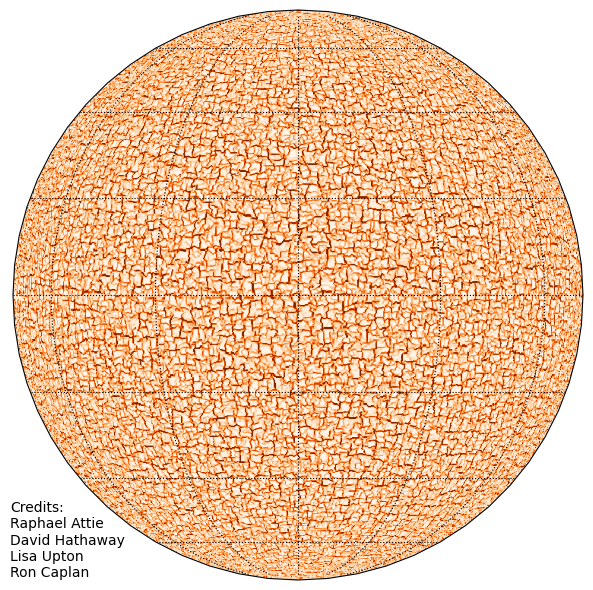

In [83]:
# See https://stackoverflow.com/questions/17365364/plotting-cylindrical-map-data-over-a-3d-sphere-in-python
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Orthographic(0, 0))
ax.imshow(lanes, origin='lower', extent=(-180, 180, -90, 90), vmin=0, vmax=6,
          transform=ccrs.PlateCarree(), cmap='Oranges', interpolation='antialiased')
ax.gridlines(color='black', linestyle='dotted')
plt.tight_layout()
ax.text(0.02, 0.03, 'Credits:\nRaphael Attie\nDavid Hathaway\nLisa Upton\nRon Caplan', transform=plt.gcf().transFigure, color='black')
plt.savefig('SG_sphere_lon0_lat0.png', dpi=180)
plt.show()



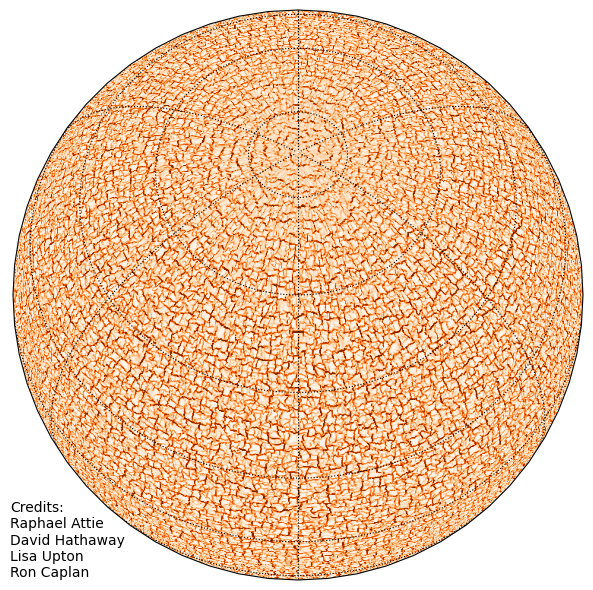

In [79]:
fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.Orthographic(0, 60))
ax.imshow(lanes, origin='lower', extent=(-180, 180, -90, 90), vmin=0, vmax=6,
          transform=ccrs.PlateCarree(), cmap='Oranges', interpolation='antialiased')
ax.gridlines(color='black', linestyle='dotted')
plt.tight_layout()
ax.text(0.02, 0.03, 'Credits:\nRaphael Attie\nDavid Hathaway\nLisa Upton\nRon Caplan', transform=plt.gcf().transFigure, color='black')
plt.savefig('SG_sphere_lon0_lat60.png', dpi=180)
plt.show()


In [ ]:
# Plot average profile of velocity along phi and theta... 